pyTorch - Numpy 확장판

In [1]:
import torch

#np.array([1,2,3])
a = torch.tensor([1,2,3])
a[[0,1]]


: 

In [187]:
a.numpy()
import numpy as np
np.array(a)
a.float() #float32

C:\Users\KDT51\AppData\Local\Temp\ipykernel_23088\3962188881.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(a)


tensor([1., 2., 3.])

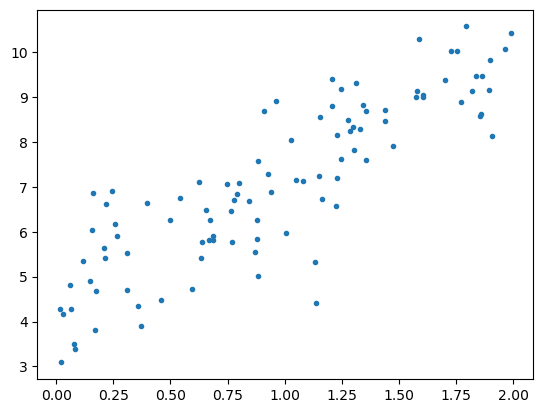

In [188]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = torch.rand(m, 1) * 2
y = x * 3 + 4 + torch.randn(m, 1)

# plt는 numpy만 취급
# torch.tensor -> numpy로 묵시적 형변환
# torch.tensor인데 plt로 출력이 안 된다? -> 원인의 대부분은 numpy 변환이 안 되서
# tensor -> array 변환 불가한 상황이 많다...
plt.plot(x, y, '.')

In [189]:
torch.linalg.pinv(torch.cat([x, x**0], axis=1)) @ y
#np.linalg.pinv(np.c_[x, x**0]) @ y

tensor([[2.7785],
        [4.4074]])

파이토치 미분

In [192]:
import torch
# f(x) = 3*x**2 + x + 2
# x==2일 때 기울기를 구하시오?
# f'(x) = 6x+1
# f'(2) => 13

# requires-grad 옵션이 붙으면
#  내부 연산 과정을 모두 트리 구조로 저장
#  -> 미분할 때 활용
x = torch.tensor(2., requires_grad=True) # 미분 대상
z = 3 * x ** 2 + x + 2
z.backward() # z를 미분
x.grad

tensor(13.)

In [174]:
z.detach() + 10

tensor(26.)

In [177]:
# f(x, y) = 2 * x ** 2 + 3 * x * y + y
# x = 1, y = 2 에서 기울기를 구하여라

x = torch.tensor(1., requires_grad = True)
y = torch.tensor(2., requires_grad = True)

z = 2 * x ** 2 + 3 * x * y + y
z.backward()
x.grad, y.grad

(tensor(10.), tensor(4.))

In [178]:
# f(a, b) = (a * x + b) ** 2
# a = 1, b = 2, x = 3 에서의 a와 b에 대한 기울기를 구하여라

a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
x = torch.tensor(3.)

z = (a * x + b) ** 2
z.backward()
a.grad, b.grad



(tensor(30.), tensor(10.))

In [179]:
a.grad = None
b.grad = None
z = (a * x + b) ** 2
z.backward()
a.grad, b.grad

# backward 는 하나의 텐서에 대해 한 번만 실행 가능
# 여러 번 미분하고 싶으면 텐서를 계속 생성


(tensor(30.), tensor(10.))

Numpy

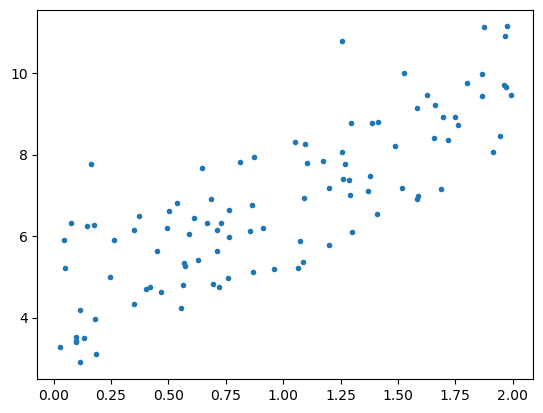

In [153]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = np.random.rand(m, 1) * 2
# 0~1 사이즈 난수를 (100, 1) 형태로 생성
# *2 -> 범위를 0~2로 확장
y = x * 3 + 4 + np.random.randn(m, 1) # 노이즈 추가

plt.plot(x, y, '.')


# y = 3x+4 직선에 노이즈를 더한 데이터를 생성
# 경사하강법으로 이 파라미터(3,4)를 학습으로 찾아내는 것이 목표


In [154]:
np.linalg.pinv(np.c_[x, x**0]) @ y

array([[2.68855542],
       [4.20016819]])

In [155]:
a = np.random.randn() # 대략 -4 ~ 4 사이 랜덤
b = np.random.randn()

lr = 0.01

a, b

(0.10735090739871221, -0.5125773976449266)

In [156]:
# y = ax + b 에서 최적의 a , b를 찾기!

# 전체 샘플의 개수 N
# N개에서 일부 샘플 랜덤 추출한 것 -> batch
# batch_size : batch의 크기 (지금은 20)
# 100개의 샘플에서 20개씩 batch를 만들면 5 steps
# step -> 1회 파라미터 업데이트
# N개의 샘플 전체를 한 번 다 학습 -> epoch

a_list = []
b_list = []

for epoch in range(500):
    i = np.random.permutation(m)
    # 0 ~ 99 인덱스를 랜덤하게 섞기
    # i = [47, 3, 82, 15, 61, 29, ...]  ← 100개 랜덤 섞인 인덱스
    
    
    # step=0: bi = i[0:20]   → [47, 3, 82, 15, ...] 20개
    # step=1: bi = i[20:40]  → [61, 29, 55, 8, ...] 20개
    # step=2: bi = i[40:60]  → [33, 71, 14, 90, ...] 20개
    # step=3: bi = i[60:80]  → [6, 44, 23, 77, ...] 20개
    # step=4: bi = i[80:100] → [19, 52, 38, 66, ...] 20개
    for step in range(5):
        bi = i[step * 20 : (step + 1) * 20] # 20개씩 인덱스 추출
        bx = x[bi] 
        by = y[bi]
        
        # 현재 a,b로 예측했을 때 오차 계산
        # 예측값 - 정답
        a_grad = (2 * (bx * a + b - by) *bx).mean()
        b_grad = (2 * (bx * a + b - by)).mean()

        a = a - lr * a_grad
        b = b - lr * b_grad
        
        a_list.append(a)
        b_list.append(b)
        
print(a, b)
            


2.6893319049919913 4.200225161044318


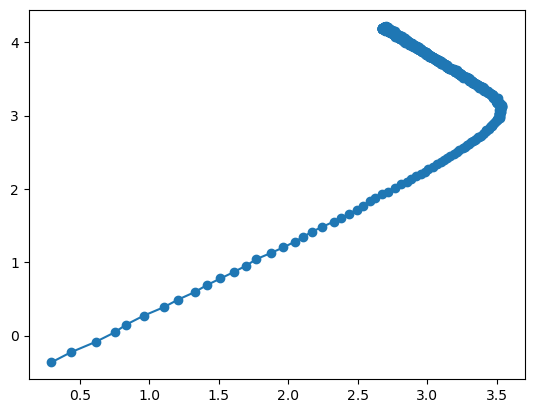

In [161]:
plt.plot(a_list, b_list, 'o-')